In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/total-emission-per-country/Total Emissions Per Country (2000-2020).csv


In [2]:
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',300)

In [3]:
df = pd.read_csv('/kaggle/input/total-emission-per-country/Total Emissions Per Country (2000-2020).csv')
df.head(5)

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,1.0277,1.2426,0.8869,1.3920,1.2742,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,0.2312,0.2796,0.1996,0.3132,0.2867,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,1.2589,1.5222,1.0865,1.7051,1.5609,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,287.9099,451.8647,413.6467,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,287.9099,451.8647,413.6467,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [4]:
df.shape

(58765, 25)

In [5]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,5.557700e+04,5.403800e+04,5.413700e+04,5.415800e+04,5.416300e+04,5.443100e+04,5.447300e+04,5.431500e+04,5.429600e+04,5.428300e+04,5.471400e+04,5.413600e+04,5.461400e+04,5.450100e+04,5.437900e+04,5.428900e+04,5.425200e+04,5.407600e+04,5.402400e+04,5.398800e+04,5.367100e+04
mean,3.856126e+04,3.904216e+04,4.028410e+04,4.100938e+04,4.286727e+04,4.314952e+04,4.444425e+04,4.471660e+04,4.537510e+04,4.548273e+04,4.590900e+04,4.661655e+04,4.684830e+04,4.726650e+04,4.815619e+04,4.861396e+04,4.859484e+04,4.928708e+04,5.020469e+04,5.077654e+04,4.934009e+04
std,5.154896e+05,5.198948e+05,5.330651e+05,5.516273e+05,5.770778e+05,5.899925e+05,6.103802e+05,6.215176e+05,6.353495e+05,6.342332e+05,6.560211e+05,6.749568e+05,6.836862e+05,6.885162e+05,7.002371e+05,7.023532e+05,7.003692e+05,7.107106e+05,7.267194e+05,7.328659e+05,7.085584e+05
min,-3.477871e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.379504e+06,-3.183029e+06,-3.148175e+06,-3.206885e+06,-3.284492e+06,-3.923198e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.331180e+06,-2.696392e+06,-2.702046e+06,-2.636985e+06,-2.636985e+06
25%,8.800000e-02,5.930000e-02,6.430000e-02,7.172500e-02,6.730000e-02,7.500000e-02,7.510000e-02,8.380000e-02,7.950000e-02,8.520000e-02,9.520000e-02,9.037500e-02,9.400000e-02,8.600000e-02,9.400000e-02,9.900000e-02,9.840000e-02,1.024000e-01,9.540000e-02,1.056750e-01,9.850000e-02
50%,1.818250e+01,1.578825e+01,1.662830e+01,1.739455e+01,1.733800e+01,1.839900e+01,1.794510e+01,1.874600e+01,1.917250e+01,1.928380e+01,2.020410e+01,2.015420e+01,2.029590e+01,2.051560e+01,2.026050e+01,2.099980e+01,2.172340e+01,2.151655e+01,2.103045e+01,2.225050e+01,2.240500e+01
75%,9.975307e+02,9.487612e+02,9.850304e+02,1.024513e+03,1.029695e+03,1.071787e+03,1.052052e+03,1.073137e+03,1.077510e+03,1.081210e+03,1.120934e+03,1.110414e+03,1.128912e+03,1.140294e+03,1.141328e+03,1.161278e+03,1.193939e+03,1.177659e+03,1.166767e+03,1.180875e+03,1.192541e+03
max,3.880104e+07,3.858777e+07,3.977286e+07,4.107819e+07,4.314763e+07,4.407000e+07,4.578420e+07,4.632066e+07,4.721273e+07,4.713105e+07,4.873805e+07,4.913564e+07,4.995763e+07,5.014924e+07,5.110725e+07,5.127620e+07,5.182366e+07,5.252879e+07,5.370033e+07,5.414186e+07,5.201086e+07


In [6]:
df.isna().sum()

Area          0
Item          0
Element       0
Unit          0
2000       3188
2001       4727
2002       4628
2003       4607
2004       4602
2005       4334
2006       4292
2007       4450
2008       4469
2009       4482
2010       4051
2011       4629
2012       4151
2013       4264
2014       4386
2015       4476
2016       4513
2017       4689
2018       4741
2019       4777
2020       5094
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     58765 non-null  object 
 1   Item     58765 non-null  object 
 2   Element  58765 non-null  object 
 3   Unit     58765 non-null  object 
 4   2000     55577 non-null  float64
 5   2001     54038 non-null  float64
 6   2002     54137 non-null  float64
 7   2003     54158 non-null  float64
 8   2004     54163 non-null  float64
 9   2005     54431 non-null  float64
 10  2006     54473 non-null  float64
 11  2007     54315 non-null  float64
 12  2008     54296 non-null  float64
 13  2009     54283 non-null  float64
 14  2010     54714 non-null  float64
 15  2011     54136 non-null  float64
 16  2012     54614 non-null  float64
 17  2013     54501 non-null  float64
 18  2014     54379 non-null  float64
 19  2015     54289 non-null  float64
 20  2016     54252 non-null  float64
 21  2017     540

In [8]:
df.dropna(inplace=True)

In [9]:
df.groupby(['Area']).size().reset_index().head(267)

,Area,0
0,Afghanistan,201
1,Africa,212
2,Albania,212
3,Algeria,212
4,American Samoa,96
5,Americas,215
6,Andorra,133
7,Angola,200
8,Anguilla,145
9,Annex I countries,276


In [10]:
df.Area.nunique()

268

In [11]:
df.Area.value_counts()

World                                                   282
Annex I countries                                       276
United States of America                                272
Australia                                               271
European Union (27)                                     267
France                                                  266
Italy                                                   265
Greece                                                  264
Japan                                                   264
Portugal                                                261
Spain                                                   261
Hungary                                                 260
T?kiye                                                  259
Bulgaria                                                259
Ukraine                                                 259
Poland                                                  259
Romania                                 

In [12]:
df.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [13]:
df.head(5)

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,1.0277,1.2426,0.8869,1.3920,1.2742,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,0.2312,0.2796,0.1996,0.3132,0.2867,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,1.2589,1.5222,1.0865,1.7051,1.5609,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,287.9099,451.8647,413.6467,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,287.9099,451.8647,413.6467,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [14]:
df['Total']=df['2000']+ df['2001']+ df['2002']+df['2003']+ df['2004']+df['2005']+ df['2006']+df['2007']+df['2008']+ df['2009']+df['2010']+df['2011']+df['2012']+df['2013']+df['2014']+df['2015']+df['2016']+df['2017']+df['2018']+df['2019']+df['2020']

In [15]:
#for x in df.select_dtypes(include = 'float64').columns.tolist():
 #   sum(df[x]+ df[Total_Emission]
    #print("Numeric Columns", x)

#.columns.tolist()

In [16]:
df.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'Total'],
      dtype='object')

In [17]:
df.head()

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.520,0.5267,0.8200,0.9988,0.8225,1.1821,1.0277,1.2426,...,1.2742,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170,22.8899
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.117,0.1185,0.1845,0.2247,0.1851,0.2660,0.2312,0.2796,...,0.2867,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963,5.1502
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.637,0.6452,1.0045,1.2235,1.0075,1.4481,1.2589,1.5222,...,1.5609,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133,28.0402
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,...,413.6467,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,7430.6479
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.807,170.9884,266.1975,324.2195,266.9995,383.7498,333.6093,403.3749,...,413.6467,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,7430.6479


In [18]:
country_names = df.Area.value_counts().index
country_names

Index(['World', 'Annex I countries', 'United States of America', 'Australia',
       'European Union (27)', 'France', 'Italy', 'Greece', 'Japan', 'Portugal',
       ...
       'American Samoa', 'Northern Mariana Islands', 'Western Sahara',
       'Wallis and Futuna Islands', 'Isle of Man', 'Norfolk Island',
       'Pitcairn', 'Svalbard and Jan Mayen Islands', 'Holy See',
       'Channel Islands'],
      dtype='object', length=268)

In [19]:
country_value = df.Area.value_counts().values
country_value

array([282, 276, 272, 271, 267, 266, 265, 264, 264, 261, 261, 260, 259,
       259, 259, 259, 259, 256, 254, 254, 254, 253, 253, 253, 253, 251,
       251, 249, 249, 249, 249, 248, 248, 248, 248, 246, 245, 244, 244,
       243, 242, 240, 239, 237, 235, 215, 215, 215, 215, 215, 215, 215,
       215, 215, 215, 215, 215, 215, 215, 214, 214, 214, 213, 213, 212,
       212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212,
       212, 212, 212, 211, 211, 211, 211, 211, 210, 209, 209, 209, 209,
       209, 209, 209, 209, 209, 208, 208, 208, 208, 208, 208, 208, 208,
       208, 208, 207, 207, 207, 207, 207, 207, 206, 206, 206, 206, 206,
       206, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205,
       205, 205, 204, 204, 203, 203, 203, 203, 203, 203, 202, 202, 202,
       202, 202, 201, 201, 201, 201, 201, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 199, 199, 199, 199, 199, 199, 199,
       199, 199, 199, 199, 199, 199, 199, 199, 198, 197, 196, 19

([<matplotlib.patches.Wedge at 0x7f0270fe9790>,
 [Text(0.5306586429040969, 0.963535886571529, 'World'),
  Text(-1.0992121352282411, -0.04162549419491825, 'Annex I countries'),
  Text(0.5667399820928948, -0.9427649721417026, 'United States of America')])

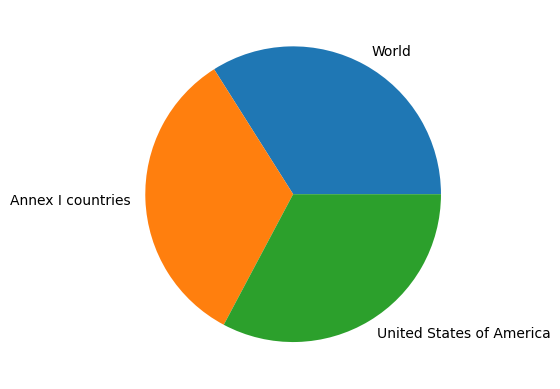

In [20]:
#top three countries with maximum pollution 
import matplotlib.pyplot as plt
plt.pie(country_value[:3], labels=country_names[:3])

In [21]:
df.groupby(['Area','Item']).size().reset_index()

,Area,Item,0
0,Afghanistan,AFOLU,6
1,Afghanistan,Agri-food systems,6
2,Afghanistan,Agricultural Soils,5
3,Afghanistan,All sectors with LULUCF,6
4,Afghanistan,All sectors without LULUCF,6
...,...,...,...
9955,Zimbabwe,Rice Cultivation,3
9956,Zimbabwe,Savanna fires,5
9957,Zimbabwe,Synthetic Fertilizers,5
9958,Zimbabwe,Waste,5
